<a href="https://colab.research.google.com/github/Ivan270/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [114]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [115]:
# Almacenando tiendas en una lista
tiendas = [tienda, tienda2, tienda3, tienda4]

# Lista con los ingresos de cada tienda
ingresos_totales = [sum(store['Precio']) for store in tiendas]

# Ingreso de todas las tiendas sumado
ingreso_global = sum(ingresos_totales)

In [109]:
print(ingresos_totales)
print(ingreso_global)

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
4403619200.0


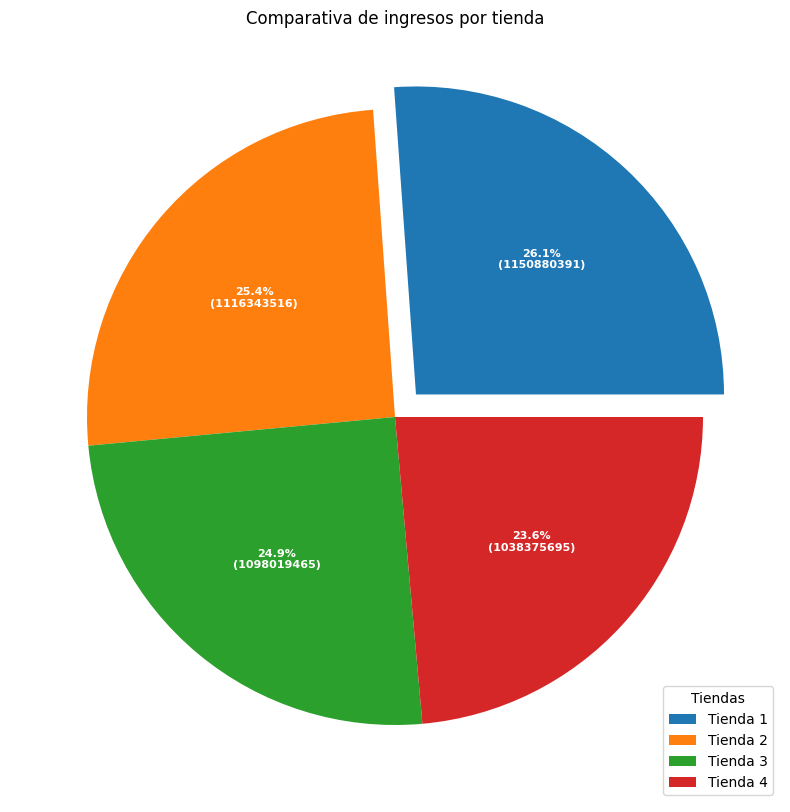

In [110]:
# Visualización
import matplotlib.pyplot as plt
import numpy as np

data = ingresos_totales
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

explode = (0.1, 0.0, 0.0, 0.0)

def func(pct, allvalues):
  absolute = int(pct / 100.*np.sum(allvalues))
  return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), explode=explode, labels=tiendas, startangle=0, textprops=dict(color="white"))

ax.legend(wedges, tiendas, title="Tiendas", loc="lower right")
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Comparativa de ingresos por tienda")
plt.show()

# 2. Ventas por categoría

In [4]:
# Detectando categorías
categorias = set(tienda['Categoría del Producto'])

# Función para ordenar categorías por cantidad de venta. Recibe una tienda (lista)
def ventas_categoria(store:list):
  # Almacena conteo de ventas por categoría
  conteo_categorias = []
  # Recorre categorías posibles
  for categoria in categorias:
    entradas = list(store['Categoría del Producto'])
    cuenta = 0
    for item in entradas:
      if item == categoria: cuenta += 1
    conteo_categorias.append((categoria, cuenta))
  # Ordena ventas por categoría de mayor a menor
  conteo_categorias.sort(key=lambda x: x[1], reverse=True)
  return conteo_categorias

In [17]:
analisis_categorias = {f'Tienda {i+1}': ventas_categoria(tiendas[i]) for i in range(len(tiendas))}
print(analisis_categorias)

{'Tienda 1': [('Muebles', 465), ('Electrónicos', 448), ('Juguetes', 324), ('Electrodomésticos', 312), ('Deportes y diversión', 284), ('Instrumentos musicales', 182), ('Libros', 173), ('Artículos para el hogar', 171)], 'Tienda 2': [('Muebles', 442), ('Electrónicos', 422), ('Juguetes', 313), ('Electrodomésticos', 305), ('Deportes y diversión', 275), ('Instrumentos musicales', 224), ('Libros', 197), ('Artículos para el hogar', 181)], 'Tienda 3': [('Muebles', 499), ('Electrónicos', 451), ('Juguetes', 315), ('Electrodomésticos', 278), ('Deportes y diversión', 277), ('Libros', 185), ('Artículos para el hogar', 177), ('Instrumentos musicales', 177)], 'Tienda 4': [('Muebles', 480), ('Electrónicos', 451), ('Juguetes', 338), ('Deportes y diversión', 277), ('Electrodomésticos', 254), ('Artículos para el hogar', 201), ('Libros', 187), ('Instrumentos musicales', 170)]}


# 3. Calificación promedio de la tienda


In [113]:
def promedio_calificacion(store:list)->float:
  '''
    Función para calcular promedio de calificaciones de una tienda.
    store: list
      Lista con las ventas de una tienda
    return = calculo: float
      Promedio calculado de calificación
  '''
  return sum(store['Calificación'])/len(store['Calificación'])

In [126]:
# Almacena lista de promedios de todas las tiendas
promedios = []
# Recorre lista de tiendas calculando respectivo promedio redondeado
for i in range(len(tiendas)):
  promedios.append((f'Tienda {i+1}',round(promedio_calificacion(tiendas[i]),2)))

# Ordenar tienda de mejor a peor evaluadas
promedios.sort(key=lambda x: x[1], reverse= True)


print(promedios)

[('Tienda 3', 4.05), ('Tienda 2', 4.04), ('Tienda 4', 4.0), ('Tienda 1', 3.98)]


# 4. Productos más y menos vendidos

In [8]:
# Set de productos disponibles
productos_posibles = list(set(tienda['Producto']).intersection(tienda2['Producto'], tienda3['Producto'], tienda4['Producto']))

# # Función para ordenar productos por cantidad de venta. Recibe una tienda (lista)
def ventas_productos(store:list):
  # Almacena conteo de ventas por producto
  conteo_productos = []
  # Recorre productos posibles
  for prod in productos_posibles:
    entradas = list(store['Producto'])
    cuenta = 0
    for item in entradas:
      if item == prod: cuenta += 1
    conteo_productos.append((prod, cuenta))
  # Ordena ventas por producto de mayor a menor
  conteo_productos.sort(key=lambda x: x[1], reverse=True)
  return conteo_productos

In [127]:
# Identificar productos mas y menos vendidos por tienda
analisis_venta_productos = []
for i in range(len(tiendas)):
  analisis_venta_productos.append((f'Tienda {i+1}', ventas_productos(tiendas[i])[0], ventas_productos(tiendas[i])[-1]))

print(analisis_venta_productos)

[('Tienda 1', ('TV LED UHD 4K', 60), ('Celular ABXY', 33)), ('Tienda 2', ('Iniciando en programación', 65), ('Juego de mesa', 32)), ('Tienda 3', ('Kit de bancas', 57), ('Bloques de construcción', 35)), ('Tienda 4', ('Cama box', 62), ('Guitarra eléctrica', 33))]


In [10]:
import matplotlib.pyplot as plt
import numpy as np

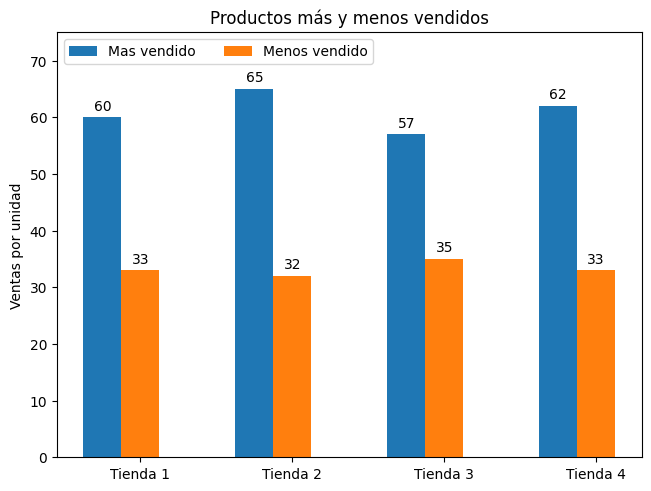

In [238]:
# Visualización de productos mas y menos vendidos


etiquetas_tiendas = ('Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4')
mas_vendidos = [analisis[1][1] for analisis in analisis_venta_productos]
prod_mas_vendidos =[analisis[1][0] for analisis in analisis_venta_productos]

menos_vendidos = [analisis[2][1] for analisis in analisis_venta_productos]
prod_menos_vendidos = [analisis[2][0] for analisis in analisis_venta_productos]

a_mostrar = {
    'Mas vendido': [tuple(mas_vendidos), prod_mas_vendidos],
    'Menos vendido': [tuple(menos_vendidos), prod_menos_vendidos]
}

x = np.arange(len(etiquetas_tiendas))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in a_mostrar.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement[0], width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Ventas por unidad')
ax.set_title('Productos más y menos vendidos')
ax.set_xticks(x + width, etiquetas_tiendas)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, max(mas_vendidos)+10)

plt.show()

# 5. Envío promedio por tienda

In [12]:
promedios_envio = []

for store in tiendas:
  promedios_envio.append(round(sum(store['Costo de envío'])/len(store['Costo de envío']),2))
print(promedios_envio)

[26018.61, 25216.24, 24805.68, 23459.46]


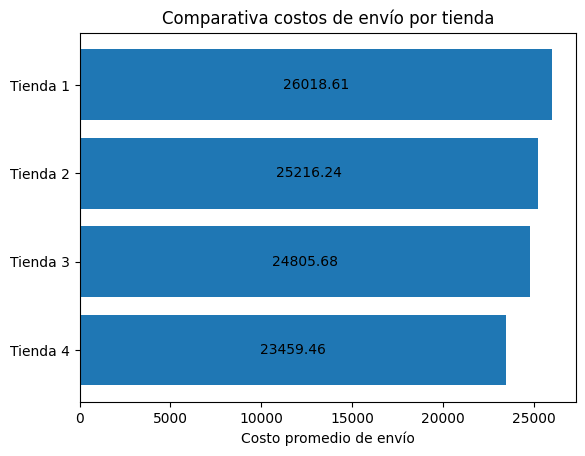

In [129]:
# Visualizando
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(etiquetas_tiendas))
error = np.random.rand(len(etiquetas_tiendas))

ax.set_yticks(y_pos, labels=etiquetas_tiendas)
ax.invert_yaxis()
ax.set_xlabel('Costo promedio de envío')
ax.set_title('Comparativa costos de envío por tienda')

# Incluir precio dentro de la barra
bars = ax.barh(etiquetas_tiendas, promedios_envio)

for bar in bars:
    width = bar.get_width()
    label_x_position = width / 2
    ax.text(label_x_position, bar.get_y() + bar.get_height() / 2,
            f'{width}', ha='center', va='center')

plt.show()

# 6. Análisis de desempeño geográfico

In [132]:
import folium
from folium.plugins import HeatMap

In [242]:

# Sample data: multiple lists of latitude and longitude pairs
list1 = [[37.7749, -122.4194], [37.7850, -122.4200], [37.7900, -122.4300]]
list2 = [[34.0522, -118.2437], [34.0600, -118.2500], [34.0700, -118.2600]]
list3 = [[40.7128, -74.0060], [40.7200, -74.0100], [40.7300, -74.0200]]

# # Combine all lists into a single list
all_locations = list1 + list2 + list3

coordenadas_ventas = []

for store in tiendas:
  locs = [[float(store['lat'][i]), float(store['lon'][i])] for i in range(len(store))]
  coordenadas_ventas += locs

# Latitud y longitud media para centrar el mapa inicial
lat_media = sum(lat for lat, lon in coordenadas_ventas)/len(coordenadas_ventas)
lon_media = sum(lon for lat, lon in coordenadas_ventas)/len(coordenadas_ventas)

m = folium.Map(location=[lat_media, lon_media], zoom_start=5)

HeatMap(coordenadas_ventas).add_to(m)
m

# Informe Final
Se han recibido datos de 4 tiendas del Sr. Juan que contienen información extraída de sus bases de datos relacionadas con los datos de productos, categorías de productos, precios, costes de envío, fecha y ubicación de compra, evaluación de clientes, tipo de pagos y coordenadas geográficas.
El objetivo principal del análisis de estos datos es identificar cuál de las 4 tiendas tiene peor desempeño para facilitar la toma de decisiones para el cliente.
De acuerdo a la información recibida de las 4 tiendas, podemos analizar algunos datos de gran importancia:

## Ingresos totales por tienda
En esta sección se analizan las ventas de cada tienda y se contrastan entre sí para determinar el desempeño comercial.

De un total global de ventas de $4,403,619.200 , el desglose de ventas por tienda es:
>* Tienda 1: 26.1% --> Más vendedora
>* Tienda 2: 25.4%
>* Tienda 3: 24.9%
>* Tienda 4: 23.6% --> Menos vendedora

## Categorías de productos más y menos vendidas
En esta sección se identificaron distintas categorías en cada tienda y se ordenaron de más a menos ventas.

### Más vendidos
>* Tienda 1: Muebles con 465 ventas
>* Tienda 2: Muebles con 442 ventas
>* Tienda 3: Muebles con 499 ventas
>* Tienda 4: Muebles con 480 ventas

### Menos vendidos
>* Tienda 1: Artículos para el hogar con 171 ventas
>* Tienda 2: Artículos para el hogar con 181 ventas
>* Tienda 3: Artículos del hogar e Instrumentos musicales con 177 ventas
>* Tienda 4: Instrumentos musicales con 170 ventas

## Calificaciones promedio de clientes por tienda
En esta sección se realizó un promedio de calificaciones entregadas por clientes en cada tienda.

Las tiendas, ordenadas de mejor a peor calificada, son:
>* Tienda 3 - 4.05 pts
>* Tienda 2 - 4.04 pts
>* Tienda 4 - 4.0 pts
>* Tienda 1 - 3.98 pts

## Productos más y menos vendidos
Siguiendo con una metodología similar al ítem de categorías más y menos vendidas, en esta sección se profundiza un poco más y se identifican los productos que han sido más y menos preferidos por los clientes.

### Más vendidos
>* Tienda 1: TV LED UHD 4K - 60 unidades
>* Tienda 2: Iniciando en programación - 65 unidades
>* Tienda 3: Kit de bancas - 57 unidades
>* Tienda 4: Cama box - 62 unidades

### Menos vendidos
>* Tienda 1: Celular ABXY - 33 unidades
>* Tienda 2: Juego de mesa - 32 unidades
>* Tienda 3: Bloques de construcción - 35 unidades
>* Tienda 4: Guitarra eléctrica - 33 unidades

## Coste de envío promedio por tienda
En esta sección se realizó un promedio de costo de envío por cada tienda. De esta forma se podrá identificar cuál es la tienda que mayor gasto presenta en este ítem.

> * Tienda 1: 26,018.61
> * Tienda 2: 25,216.24
> * Tienda 3: 24,805.68
> * Tienda 4: 23,459.46

## Conclusiones
Se puede concluir mediante el análisis de los datos anteriormente mostrados, que si se quisiera seguir por el camino del cierre de una sucursal, se recomendaría que fuera la "Tienda 4" por los siguientes motivos:
* Es la tienda con **menor contribución a los ingresos** (23.6%)
* Es la segunda tienda con **menor calificación de los clientes**, solo superada por Tienda 1. Se podría encontrar una aparente relación con el punto anterior: al ver los clientes que la atención, calidad de productos u otros factores presentes en la sucursal son deficientes, terminan por elegir NO comprar en esta tienda.
* Si bien se ve que existe un costo de envíos bajos, este puede tener relación con el bajo volumen de ventas en comparación con las otras tiendas. Por lo que habría que analizar este argumento con cuidado antes de usarlo a su favor.

Con esto podemos determinar que la mejor opción bajo los criterios ya nombrados, sería cerrar la Tienda 4.
También es importante saber que hay puntos de mejora para otras Tiendas, por ejemplo es visible que la Tienda 1 debe mejorar en el aspecto de calidad del servicio dado que actualmente es la sucursal peor evaluada por los clientes. Si bien es la que mayor tráfico de ventas tiene, son puntos que al ser mejorados puede traer aún mejores desempeños para el futuro.